In [1]:
using MatrixNetworks
using Distributions
using Clustering
using BenchmarkTools, Compat
using DelimitedFiles
using SparseArrays
using LinearAlgebra
using EllipsoidalGraphEmbedding
using Random
#using Arpack
using Plots, LaTeXStrings
using IterTools
using Statistics
using Measures





In [9]:
## krackhardt_kite_graph

elist=[
0 1 
0 2 
0 3 
0 5 
1 3 
1 4 
1 6 
2 3 
2 5 
3 4 
3 5 
3 6 
4 6 
5 6 
5 7 
6 7 
7 8
8 9
];
elist = elist .+ 1
A = adj_matrix_cc(elist)
N = size(A)[1]

10

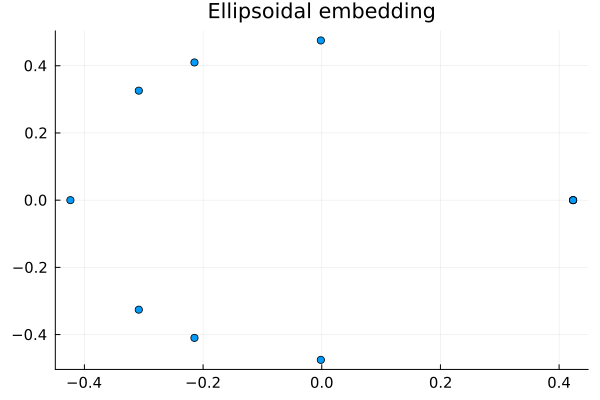

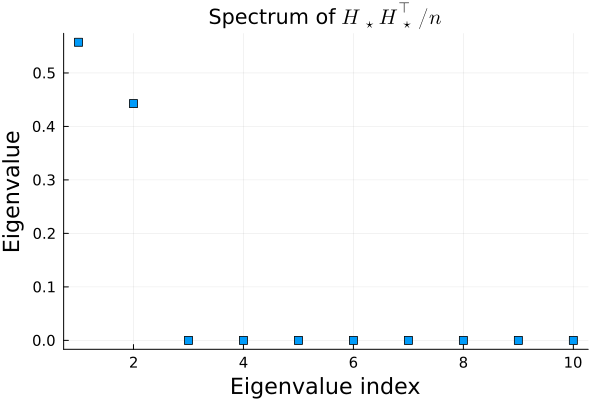

 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 69 iterations
  0.003036 seconds (1.24 k allocations: 637.109 KiB)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 10
Number of updates: 0
Modularity: -0.1111111111111111
Number of communities: 7
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.5572834257947755, 0.4427159484935078, 6.257003436552022e-7, 1.1371428253994472e-11, 1.3680806217911955e-15]
 -------------------------------------------- 
  0.010535 seconds (2.70 k allocations: 792.531 KiB)
embedding effective dim= 2


In [13]:
# number of columns of initial guess
d0 = 10

# shape of embedding
shape = "Ellipsoidal";
n_clusters = 10

# Initialization
community = zeros(Int64,N,1)
x_embed,community,sigma =  @time sphere_embed_cluster(A, d0,shape, n_clusters)


gr()
p1 = Plots.plot(x_embed[1,:],x_embed[2,:],seriestype=:scatter,  legend = false,xtickfontsize=10,ytickfontsize=10, xguidefontsize=15, yguidefontsize=15,title= "Ellipsoidal embedding")
display(p1)

p2 = Plots.plot(1:length(sigma),sigma.^2/N,seriestype=:scatter, legend = false,yticks = 0:0.1:0.5,xtickfontsize=10,ytickfontsize=10, xguidefontsize=15, yguidefontsize=15, marker=:square)
Plots.xlabel!("Eigenvalue index")
Plots.ylabel!("Eigenvalue")
Plots.title!(L"Spectrum of $H_\star H_\star^\top/n$")
display(p2)

println("embedding effective dim= ",dim_eff(sigma,0.01))

# # nicer plots
# pgfplotsx()

# p1 = Plots.plot(x_embed[1,:],x_embed[2,:],seriestype=:scatter, color = community_true, legend = false,xtickfontsize=10,ytickfontsize=10, xguidefontsize=15, yguidefontsize=15,title= "Ellipsoidal embedding")
# savefig("figures/LFR_"*set*"_embedding.pdf")

# p2 = Plots.plot(1:length(sigma),sigma.^2/N,seriestype=:scatter, legend = false,yticks = 0:0.1:0.5,xtickfontsize=10,ytickfontsize=10, xguidefontsize=15, yguidefontsize=15, marker=:square)
# Plots.xlabel!("Eigenvalue index")
# Plots.ylabel!("Eigenvalue")
# Plots.title!(L"Spectrum of $H_\star H_\star^\top/n$")
# savefig("figures/LFR_"*set*"_spectrum.pdf")


In [14]:
using Graphs, GraphPlot
using CairoMakie
CairoMakie.activate!(type="png")
set_theme!(resolution=(400, 400))
using GraphMakie: graphplot
using GraphMakie: graphplot!
using CairoMakie.Colors

In [ ]:

g = Graph(A)
x = x_embed'
function mylayout(g)
    # create iterator going over x-coord and y-coord 
    return Point.(zip(x[:, 1], x[:, 2],x[:, 3]))
end

f, ax, p = graphplot(g; layout=mylayout,edge_color=:blue,node_size=1,edge_width=1)  
f